Описание датасета:

Id - идентификационный номер квартиры

DistrictId - идентификационный номер района

Rooms - количество комнат

Square - площадь

LifeSquare - жилая площадь

KitchenSquare - площадь кухни

Floor - этаж

HouseFloor - количество этажей в доме

HouseYear - год постройки дома

Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности

Social_1, Social_2, Social_3 - социальные показатели местности

Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья

Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров

Price - цена квартиры


In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt

%matplotlib inline

In [37]:
X = pd.read_csv('train.csv', index_col = 'Id')
X_test = pd.read_csv('test.csv', index_col = 'Id')
X.head(10)

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
Id,,,,,,,,,,,,,,,,,,,
14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644
12915,59,3.0,80.384479,46.683720,12.0,5,17.0,2011,0.309479,B,B,35,7715,4,990.0,0,6,B,215898.447742
14549,154,2.0,62.254114,37.160377,7.0,3,5.0,1960,0.460556,B,B,20,4386,14,NaN,1,5,B,296021.204377
11993,74,2.0,80.312926,NaN,0.0,14,0.0,1977,0.075779,B,B,6,1437,3,NaN,0,2,B,221244.156664
5172,1,2.0,64.511437,NaN,1.0,9,17.0,1977,0.007122,B,B,1,264,0,NaN,0,1,B,229102.795999


In [3]:
parameters = [{'n_estimators' : [900],
               'max_features' : np.arange(6,7),
               'max_depth':np.arange(18,19)}]

In [4]:
clf = GridSearchCV(estimator=RandomForestRegressor(random_state=33),
                  param_grid=parameters,
                  scoring='r2',
                  cv=5)


In [5]:
print(X.shape, X_test.shape)
X.describe().T

(10000, 19) (5000, 18)


,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,2.090000e+02
Rooms,10000.0,1.890500,0.839512,0.000000,1.000000,2.000000,2.000000,1.900000e+01
Square,10000.0,56.315775,21.058732,1.136859,41.774881,52.513310,65.900625,6.410652e+02
LifeSquare,7887.0,37.199645,86.241209,0.370619,22.769832,32.781260,45.128803,7.480592e+03
KitchenSquare,10000.0,6.273300,28.560917,0.000000,1.000000,6.000000,9.000000,2.014000e+03
Floor,10000.0,8.526700,5.241148,1.000000,4.000000,7.000000,12.000000,4.200000e+01
HouseFloor,10000.0,12.609400,6.775974,0.000000,9.000000,13.000000,17.000000,1.170000e+02
HouseYear,10000.0,3990.166300,200500.261427,1910.000000,1974.000000,1977.000000,2001.000000,2.005201e+07
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,5.218671e-01
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,7.400000e+01


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
 18  Pri

In [7]:
feature_digit = X.drop("Price", axis=1).\
            select_dtypes(include=['float64','int64']).\
            columns.tolist()
feature_digit

['DistrictId',
 'Rooms',
 'Square',
 'LifeSquare',
 'KitchenSquare',
 'Floor',
 'HouseFloor',
 'HouseYear',
 'Ecology_1',
 'Social_1',
 'Social_2',
 'Social_3',
 'Healthcare_1',
 'Helthcare_2',
 'Shops_1']

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12416898>,
      dtype=object)

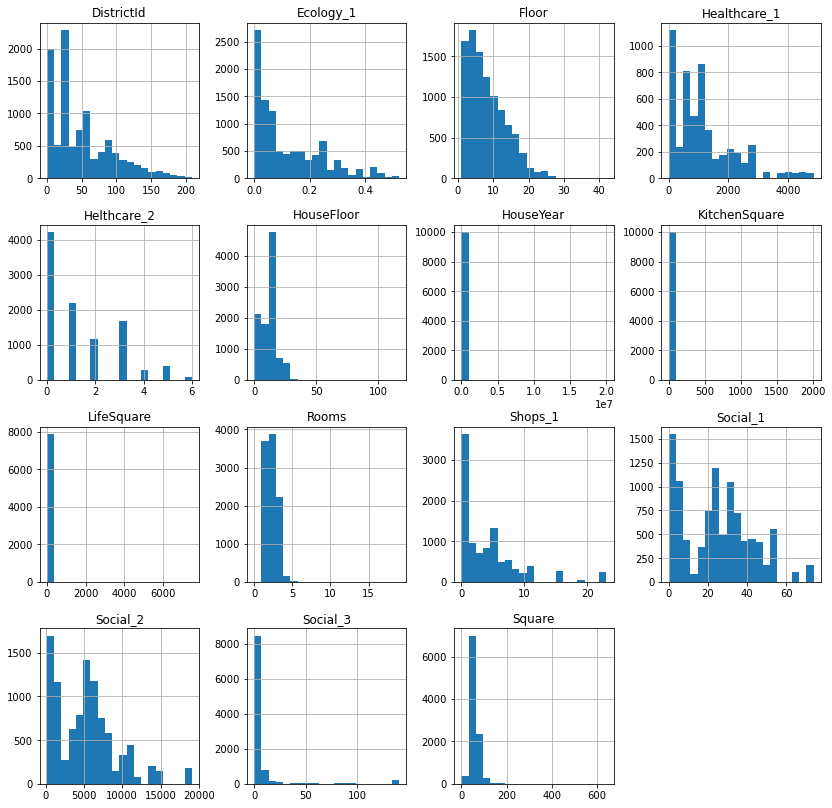

In [8]:
X[feature_digit].hist(figsize=(14,14), bins=20)

In [38]:
X.Helthcare_2 = X.Helthcare_2.astype(str)
X_test.Helthcare_2 = X_test.Helthcare_2.astype(str) 
X.Helthcare_2.value_counts()

0    4214
1    2183
3    1670
2    1158
5     388
4     288
6      99
Name: Helthcare_2, dtype: int64

In [39]:
X.drop('Healthcare_1', 1, inplace=True)
X_test.drop('Healthcare_1', 1, inplace=True)


### Очистка данных

In [40]:
# преобразуем категориальные фичи в дамми переменные
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

In [41]:
# работа с выбросами и null значениями
def cl_data(lst:list):
    median_room = lst[0].Rooms.median()
    median_LifeSquare = lst[1].LifeSquare.median()

    for i in lst:

        i.loc[i['Rooms']>5, 'Rooms'] = median_room
        i.loc[i['Rooms']==0, 'Rooms'] = 1

        
        i.loc[i['LifeSquare']>250, 'LifeSquare'] = median_LifeSquare
        i.loc[(i['LifeSquare'].isna()), 'LifeSquare'] = \
                            i.loc[(i['LifeSquare'].isna()), 'Square'] - \
                            i.loc[(i['LifeSquare'].isna()), 'KitchenSquare'] 

        
        i.loc[i['Square']>300, 'Square'] = \
                            i.loc[i.Square>300, 'LifeSquare'] + \
                            i.loc[i.Square>300, 'KitchenSquare']
        i.loc[i['Square']==0, 'Square'] = \
                            i.loc[i['Square']==0, 'LifeSquare'] + \
                            i.loc[i['Square']==0, 'KitchenSquare']

        
        i.loc[i.KitchenSquare >i.Square, 'KitchenSquare'] = \
                            i.loc[i.KitchenSquare >i.Square, 'Square'] - \
                            i.loc[i.KitchenSquare >i.Square, 'LifeSquare']
        i.loc[i.KitchenSquare==0, "KitchenSquare"] = 3

        
        i.loc[i.HouseFloor>98, 'HouseFloor'] = i.HouseFloor.mode()[0]
        
        i.loc[i.Floor==0, "Floor"]=1
        i.loc[i.Floor>i.HouseFloor, 'Floor'] = i.loc[i.Floor>i.HouseFloor, 'HouseFloor'] 

        
        
        i.loc[i.HouseYear>2020, 'HouseYear'] = 2020 
           

In [42]:
cl_data([X, X_test])
X.describe().T

,count,mean,std,min,25%,50%,75%,max
DistrictId,10000.0,50.400800,43.587592,0.000000,20.000000,36.000000,75.000000,209.000000
Rooms,10000.0,1.887600,0.811438,1.000000,1.000000,2.000000,2.000000,5.000000
Square,10000.0,56.219311,19.920599,1.136859,41.774881,52.502558,65.890819,604.705972
LifeSquare,10000.0,40.890497,21.210719,0.370619,25.494155,37.010885,49.771534,603.705972
KitchenSquare,10000.0,6.073450,4.886935,0.652759,3.000000,6.000000,9.000000,123.000000
Floor,10000.0,7.700400,5.304060,0.000000,4.000000,7.000000,11.000000,42.000000
HouseFloor,10000.0,12.583000,6.583027,0.000000,9.000000,13.000000,17.000000,48.000000
HouseYear,10000.0,1984.872400,18.416347,1910.000000,1974.000000,1977.000000,2001.000000,2020.000000
Ecology_1,10000.0,0.118858,0.119025,0.000000,0.017647,0.075424,0.195781,0.521867
Social_1,10000.0,24.687000,17.532614,0.000000,6.000000,25.000000,36.000000,74.000000


### Добавление feature

In [43]:
district_size = X.DistrictId.value_counts().reset_index().\
                rename(columns={'index':"DistrictId", 
                                'DistrictId':'DistrictSize'})
district_size.head()

,DistrictId,DistrictSize
0,27,851
1,1,652
2,23,565
3,6,511
4,9,294


In [44]:
districts_popular = district_size.loc[district_size.DistrictId>50,
                                     'DistrictId'].tolist()
len(districts_popular)

154

In [45]:
district_size.loc[~district_size['DistrictId'].isin(districts_popular),
                 'DistrictId'] = 999
district_size = district_size.groupby('DistrictId')['DistrictSize'].\
                agg(DistrictSize='median')
district_size.reset_index(level='DistrictId', inplace=True)
district_size.head()

,DistrictId,DistrictSize
0,51,5
1,52,143
2,53,174
3,54,37
4,55,58


In [46]:
X.loc[~X.DistrictId.isin(districts_popular), 'DistrictId'] = 999
X_test.loc[~X_test.DistrictId.isin(districts_popular), 'DistrictId'] = 999

In [47]:
X = X.merge(district_size,
            on='DistrictId',
            how='left').set_index(X.index)

X_test = X_test.merge(district_size, 
                      on='DistrictId', 
                      how='left').set_index(X_test.index)

X.head()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,...,Helthcare_2_0,Helthcare_2_1,Helthcare_2_2,Helthcare_2_3,Helthcare_2_4,Helthcare_2_5,Helthcare_2_6,Shops_2_A,Shops_2_B,DistrictSize
Id,,,,,,,,,,,,,,,,,,,,,
14038,999,2.0,47.981561,29.442751,6.0,7.0,9.0,1969,0.089040,33,...,1,0,0,0,0,0,0,0,1,65
15053,999,3.0,65.683640,40.049543,8.0,7.0,9.0,1978,0.000070,46,...,0,1,0,0,0,0,0,0,1,65
4765,53,2.0,44.947953,29.197612,3.0,8.0,12.0,1968,0.049637,34,...,0,1,0,0,0,0,0,0,1,174
5809,58,2.0,53.352981,52.731512,9.0,8.0,17.0,1977,0.437885,23,...,1,0,0,0,0,0,0,0,1,179
10783,99,1.0,39.649192,23.776169,7.0,11.0,12.0,1976,0.012339,35,...,0,0,1,0,0,0,0,0,1,97


In [48]:
X['PriceOneRoom'] = X['Price'] / X['Rooms']
X['PriceOneRoom'].describe()

count     10000.000000
mean     124325.300092
std       50789.782488
min       20585.693968
25%       89463.217769
50%      115017.052645
75%      153088.499741
max      594565.299770
Name: PriceOneRoom, dtype: float64

In [49]:
price_by_district = X.groupby(['DistrictId'], as_index=False)\
                        .agg({'PriceOneRoom':'median'})\
                        .rename(columns={'PriceOneRoom':'PriceOneRoomByDistrict'})

price_by_district

,DistrictId,PriceOneRoomByDistrict
0,51,136780.061294
1,52,97309.458879
2,53,138669.199925
3,54,185149.251650
4,55,117333.817114
...,...,...
150,205,220501.566180
151,207,142062.136445
152,208,215568.827041
153,209,140048.802277


In [50]:
X = X.merge(price_by_district, on=['DistrictId'], how='left').set_index(X.index)
X_test = X_test.merge(price_by_district, on=['DistrictId'], how='left').set_index(X_test.index)

In [51]:
X['PricePerMeter'] = X['Price'] / X['Square']
X['PricePerMeter'].describe()

count     10000.000000
mean       3988.862691
std        3755.115280
min         310.427301
25%        2919.860059
50%        3910.052336
75%        4692.375993
max      230463.537966
Name: PricePerMeter, dtype: float64

In [52]:
price_by_district = X.groupby(['DistrictId'], as_index=False)\
                        .agg({'PricePerMeter':'median'})\
                        .rename(columns={'PricePerMeter':'PricePerMeterByDistrict'})

price_by_district

,DistrictId,PricePerMeterByDistrict
0,51,5283.544185
1,52,2938.048239
2,53,4845.919064
3,54,4802.628223
4,55,4081.401851
...,...,...
150,205,5101.016598
151,207,5550.678339
152,208,8005.605047
153,209,4176.437542


In [53]:
X = X.merge(price_by_district, on=['DistrictId'], how='left').set_index(X.index)
X_test = X_test.merge(price_by_district, on=['DistrictId'], how='left').set_index(X_test.index)

In [54]:
X.isna().sum()

DistrictId                 0
Rooms                      0
Square                     0
LifeSquare                 0
KitchenSquare              0
Floor                      0
HouseFloor                 0
HouseYear                  0
Ecology_1                  0
Social_1                   0
Social_2                   0
Social_3                   0
Shops_1                    0
Price                      0
Ecology_2_A                0
Ecology_2_B                0
Ecology_3_A                0
Ecology_3_B                0
Helthcare_2_0              0
Helthcare_2_1              0
Helthcare_2_2              0
Helthcare_2_3              0
Helthcare_2_4              0
Helthcare_2_5              0
Helthcare_2_6              0
Shops_2_A                  0
Shops_2_B                  0
DistrictSize               0
PriceOneRoom               0
PriceOneRoomByDistrict     0
PricePerMeter              0
PricePerMeterByDistrict    0
dtype: int64

In [55]:
X['DistrictId'] = X['DistrictId'].astype(str)
X_test['DistrictId'] = X_test['DistrictId'].astype(str)


In [56]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   DistrictId               10000 non-null  object 
 1   Rooms                    10000 non-null  float64
 2   Square                   10000 non-null  float64
 3   LifeSquare               10000 non-null  float64
 4   KitchenSquare            10000 non-null  float64
 5   Floor                    10000 non-null  float64
 6   HouseFloor               10000 non-null  float64
 7   HouseYear                10000 non-null  int64  
 8   Ecology_1                10000 non-null  float64
 9   Social_1                 10000 non-null  int64  
 10  Social_2                 10000 non-null  int64  
 11  Social_3                 10000 non-null  int64  
 12  Shops_1                  10000 non-null  int64  
 13  Price                    10000 non-null  float64
 14  Ecology_2_A        

In [57]:
X.drop(['PricePerMeter', 'PriceOneRoom'], 1, inplace=True)

In [58]:
y_train = X['Price']
X_train = X.drop(['Price'], axis=1)

In [59]:
clf.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=33,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jobs

In [60]:
forest = RandomForestRegressor(max_depth=18,
                               max_features=6,
                               n_estimators=100,
                               random_state=33) 

In [61]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=18, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=33, verbose=0, warm_start=False)

In [60]:
y_pred = clf.predict(X_test)

In [61]:
rez = pd.DataFrame()
rez['Id'] = X_test.index

In [62]:
rez['Price'] = y_pred 

In [63]:
rez.to_csv('pred.csv', index=False)


In [64]:
rez.shape

(5000, 2)